In [ ]:
!pip install unrar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unrar x /content/drive/MyDrive/aug_data.rar

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Extracting  aug_data/train/labels/E_576d7796-050e-11ee-8c6c-f4a475ec8b5e.49.json      90%  OK 
Extracting  aug_data/train/labels/E_576d7796-050e-11ee-8c6c-f4a475ec8b5e.5.json      90%  OK 
Extracting  aug_data/train/labels/E_576d7796-050e-11ee-8c6c-f4a475ec8b5e.50.json      90%  OK 
Extracting  aug_data/train/labels/E_576d7796-050e-11ee-8c6c-f4a475ec8b5e.51.json      90%  OK 
Extracting  aug_data/train/labels/E_576d7796-050e-11ee-8c6c-f4a475ec8b5e.52.json      90%  OK 
Extracting  aug_data/train/labels/E_576d7796-050e-11ee-8c6c-f4a475ec8b5e.53.json      90%  OK 
Extracting  aug_data/train/labels/E_576d7796-050e-11ee-8c6c-f4a475ec8b5e.54.json      90%  OK 
Extracting  aug_data/train/labels/E_576d7796-050e-11ee-8c6c-f4a475ec8b5e.55.json      90%  OK 
Extracting  aug_data/train/labels/E_576d7796-050e-11ee-8c6c-f4a475ec8b5e.56.json      90%  OK 
Extracti

In [ ]:
import tensorflow as tf

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [ ]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [ ]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.55735296, 0.5769608 , 0.6004902 ],
        [0.5816789 , 0.59344363, 0.6208946 ],
        [0.58186275, 0.59362745, 0.62107843],
        ...,
        [0.53069854, 0.53069854, 0.5699142 ],
        [0.5294118 , 0.5294118 , 0.5686275 ],
        [0.53063726, 0.53339463, 0.5747549 ]],

       [[0.5852941 , 0.60490197, 0.6284314 ],
        [0.57598037, 0.5877451 , 0.61519605],
        [0.57303923, 0.58480394, 0.6122549 ],
        ...,
        [0.5097426 , 0.5219976 , 0.5572917 ],
        [0.51231617, 0.52457106, 0.5598652 ],
        [0.5126838 , 0.5252451 , 0.5596201 ]],

       [[0.5761642 , 0.5957721 , 0.6193015 ],
        [0.56911767, 0.5808824 , 0.60833335],
        [0.56960785, 0.58137256, 0.60882354],
        ...,
        [0.5004902 , 0.52009803, 0.54362744],
        [0.51329654, 0.5329044 , 0.5564338 ],
        [0.5115809 , 0.5311887 , 0.55471814]],

       ...,

       [[0.0872549 , 0.09117647, 0.07156863],
        [0.07254902, 0.07647059, 0.05686275],
        [0.07297794, 0

In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

In [ ]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.5923, 0.329 , 0.985 , 0.928 ], dtype=float16))

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3840, 3840, 840, 840, 840, 840)

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [ ]:
data_samples = train.as_numpy_iterator()

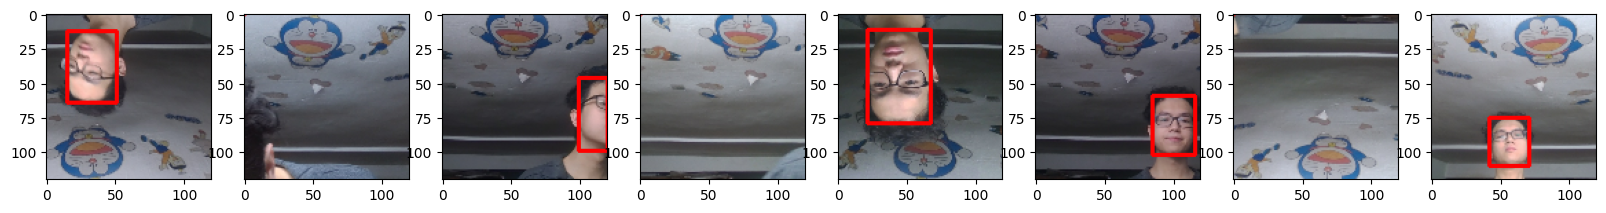

In [ ]:
res = data_samples.next()
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx in range(8):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [ ]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [ ]:
facetracker = build_model()
X, y = train.as_numpy_iterator().next()
classes, coords = facetracker.predict(X)

1/1 [==============================] - 8s 8s/step


In [ ]:
batches_per_epoch = len(train)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt, classloss, regressloss)

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
480/480 [==============================] - 52s 67ms/step - total_loss: 0.4111 - class_loss: 0.1194 - regress_loss: 0.3514 - val_total_loss: 0.2210 - val_class_loss: 0.0152 - val_regress_loss: 0.2134
Epoch 2/10
480/480 [==============================] - 42s 71ms/step - total_loss: 0.1467 - class_loss: 0.0982 - regress_loss: 0.0976 - val_total_loss: 0.0665 - val_class_loss: 3.2529e-04 - val_regress_loss: 0.0664
Epoch 3/10
480/480 [==============================] - 41s 71ms/step - total_loss: 0.1496 - class_loss: 0.0867 - regress_loss: 0.1062 - val_total_loss: 0.0201 - val_class_loss: 1.5294e-04 - val_regress_loss: 0.0200
Epoch 4/10
480/480 [==============================] - 39s 68ms/step - total_loss: 0.1149 - class_loss: 0.0723 - regress_loss: 0.0787 - val_total_loss: 1.4539 - val_class_loss: 0.3733 - val_regress_loss: 1.2673
Epoch 5/10
480/480 [==============================] - 39s 67ms/step - total_loss: 0.1555 - class_loss: 0.0773 - regress_loss: 0.1169 - val_total_loss: 0

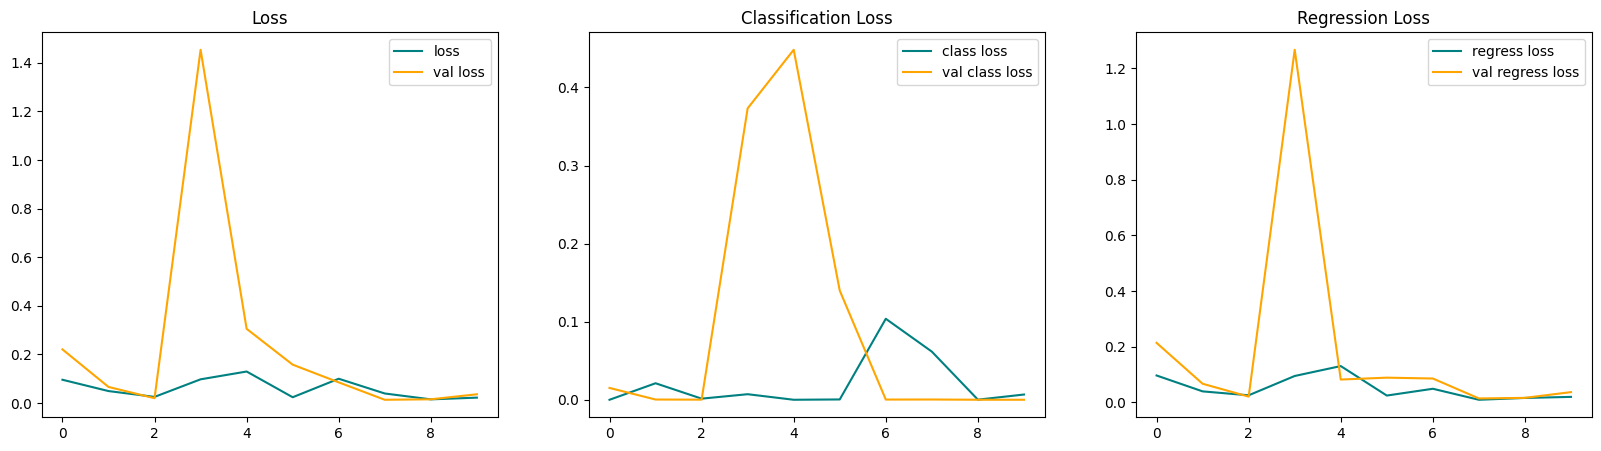

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [ ]:
test_data = test.as_numpy_iterator()

1/1 [==============================] - 0s 20ms/step


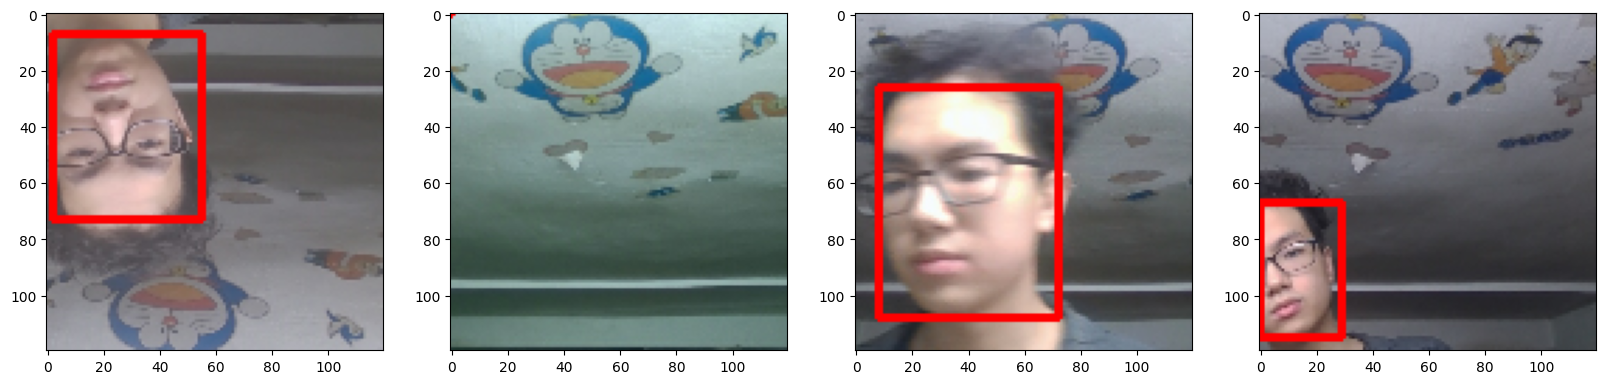

In [ ]:
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras.models import load_model
facetracker.save('facetracker.h5')